In [1]:
!pip install transformers

     |████████████████████████████████| 1.5MB 8.0MB/s 
     |████████████████████████████████| 890kB 29.3MB/s 
     |████████████████████████████████| 2.9MB 44.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=211dfdc25493b81c558d82556d290c5222a8bfc7b0f0fa302d80c9b79dc7d8b5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [2]:
import torch

I Chose BERT large

In [3]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


In [4]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [5]:
paragraph=["1.  Company’s operations continued to face challenges. The production was lower due to operational issues.",
"2. A sustainable business that would be able to endure the structural challenges faced by the European steel industry.",
'3. Tata Steel has consistently been one of the most profitable and lowest cost producers of steel in the world, the Company needs to address challenges such as improving productivity, maintaining cost competitiveness, and being agile and innovative in a rapidly evolving business environment.',
'4. We are deeply committed to co-creating scalable solutions for SO4 the most endemic development challenges of our communities.',
'5. Communities proximate to our operations live through significant socio-economic challenges while retaining a strong cultural heritage and an aspiration to overcome these challenges. The absence of an understanding of this duality in our communities and an inability to maintain a harmonious relationship with them would pose risk to our operations.',
'6. Supply chain management is key to the operations of an integrated steel plant and requires optimum inventory management of raw materials without compromising on timely delivery and supply of finished products to ',
'7. Diversity within our workforce is of paramount importance as it enhances our overall capabilities and promotes a culture of innovative thinking. To attract and retain diverse talent is a challenge considering the nature and breadth of our operations.',
'8. The Indian scrap industry is highly fragmented and unorganised with a complex supply chain, where availability of clean scrap is a challenge. There are many small aggregators who collect scrap from various sources and sell unprocessed scrap with inconsistent quality.',
'9. Tata Steel has progressively met the challenges posed by the surge in urban growth and increasing aspirations of a world-class city.',
'10. The Company has challenged the demands amounting to `132.91 crore during 2017-18 for production in excess of lower of mining plan and consent to operate limits raised by the Deputy Director of Mines, Odisha before the Mines Tribunal and obtained a stay on the matter.',
'11. The Company has made a comprehensive submission before the Deputy Director of Mines, Odisha against show cause notices amounting to `694.02 crore received during 2017-18 for production in violation of mining plan, Environment Protection Act, 1986 and Water (Prevention and Control of Pollution) Act, 1981. A demand amounting to `234.74 crore has been received in April 2018 from the Deputy Director of Mines, Odisha for production in excess of the Environmental Clearance. The Company has challenged the demand and obtained a stay on the matter from the Revisionary, Mines Tribunal, New Delhi. The demand of `234.74 crore has been provided and `694.02 crore is considered contingent.',
'12. State of Jharkhand issued renewal order to the Company on December 31, 2014. The State, however, took a view on interpretation of Goa judgement that the mining carried out after expiry of the period of second renewal was ‘illegal’ and hence, issued a demand notice of `3,568.31 crore being the price of iron ore extracted. The said demand has been challenged by the Company before the Jharkhand High Court.',
'13. Global steel demand is expected to witness a gradual recovery, though at a slower pace, owing to risk of uncertainty over the trade environment.',
'14. Financial risks- Contraction in global and domestic liquidity adversely affecting availability and cost of capital.',
'15. Regulatory risks-Withdrawal of favorable trade measures such as minimum import prices, antidumping laws, countervailing duties and tariffs, trade restrictions may impact profitability. Stringent regulations and compliances resulting in liabilities and damage to our reputation. Non-renewal of mining leases compelling higher purchases from open market at higher prices, adversely impacting profitability.',
'16. Macroeconomic and steel market risks-Slowdown in global growth, particularly in China, adversely affecting steel demand. Increasing competitive intensity in India, especially post the acquisition of steel assets by international steel producers under the Insolvency and Bankruptcy Code, 2016. Technology disruptions and shifting customer preferences to alternative materials adversely impacting earnings.',
'17. Operational risks-Inadequate assessment of health of critical equipment leading to unplanned interruption of operational processes Non-disposal of plant waste due to limited demand and storage space Logistics constraints due to inadequate rail, road and sea infrastructure may lead to disruption in operations.',
'18. Safety risks- Non-compliance/delay in implementation of the provisions of safety laws and regulations, which may lead to stoppage of operations, damage to assets and loss of reputation.',
'19. Community risks- Communities proximate to our operations live through significant socio-economic challenges while retaining a strong cultural heritage and an aspiration to overcome these challenges. The absence of an understanding of this duality in our communities and an inability to maintain a harmonious relationship with them would pose risk to our operations.',
'20. Commodity risks-Raw material price volatility is an integral part of operations Supply chain disruptions affecting availability and cost of raw materials.',
'21. Information security risks-Breach of information security incidents leading to business disruption and damage to reputation Non-compliance to IT legislations and regulations leading to penalties.',
'22. Climate change risks-Non-compliance to stringent environmental conditions leading to penalties, stoppage of operations and loss of reputation. Climate change related regulations and extreme weather events may disrupt operations and supply chain.',
'23. The climate change-related risk assessment in accordance with the Task Force on Climate-related Financial Disclosures has been initiated and mitigation strategies will be incorporated subsequently.',
'24. With increasing connectivity and data flow, we are exposed to the risk of new-age cyber crimes.',
'25. Any risk of human rights violation could have significant reputational repercussions.',
'26. An integrated health, safety & environment risk management system was rolled out across the organization to identify hazards, and assess and mitigate risks.',
'27. We follow the World Health Organization’s model of ‘healthy workplace’ for creating a workplace that does not harm the mental and physical well-being of people.',
'28. The procurement team undertakes sample assessments for human rights (for potential high-risk suppliers) to ensure compliance.',
'29. A river basin study has been initiated for the Subarnarekha river to assess watershed level risks for TSJ and implement better water management plans for improving the water scenario in the district watershed and to ensure optimum water flow in the river throughout the year.',
'30. Given the uncertain and volatile business environment, companies face continuous changes in technology, geo-politics, financial markets, regulations, etc. which affect the value chain.',
'31. The Risk oversight function consists of the Board of Directors, Risk Management Committee (‘RMC’) and Group Risk Review Committee (‘GRRC’) to oversee the risk management policy, to provide guidelines for implementing the ERM framework and ERM process across the Company. The RMC also reviews the key risks that the Company faces and the progress of the mitigation plans.',
'32. The Company inherently faces risks arising out of raw material price volatility which impacts its profitability and cash flows.',
'33. The team carries out a risk assessment of the supply chain and works consciously towards mitigating the risk of any disruption in supply chain.',
'34. Identify and assess the risks of material misstatement of the Standalone Financial Statements, whether due to fraud or error, design and perform audit procedures responsive to those risks, and obtain audit evidence that is sufficient and appropriate to provide a basis for our opinion. The risk of not detecting a material misstatement resulting from fraud is higher than for one resulting from error, as fraud may involve collusion, forgery, intentional omissions, misrepresentations, or the override of internal control.',
'35. Our audit of internal financial controls with reference to Standalone Financial Statements included obtaining an understanding of internal financial controls with reference to Standalone Financial Statements, assessing the risk that a material weakness exists, and testing and evaluating the design and operating effectiveness of internal control based on the assessed risk. The procedures selected depend on the auditor’s judgement, including the assessment of the risks of material misstatement of the Standalone Financial Statements, whether due to fraud or error.',
'36. When the fair value of financial assets and financial liabilities recorded in the balance sheet cannot be measured based on quoted prices in active markets, their fair value is measured using valuation techniques including Discounted Cash Flow Model. The inputs to these models are taken from observable markets where possible, but where this is not feasible, a degree of judgement is required in establishing fair value. Judgements include considerations of inputs such as liquidity risks, credit risks and volatility. Changes in assumptions about these factors could affect the reported fair value of financial instruments.',
'37. Recoverable amount is the higher of fair value less costs to sell and value in use. In assessing value in use, the estimated future cash flows are discounted to their present value using a pre-tax discount rate that reflects current market assessments of the time value of money and the risks specific to the asset for which the estimates of future cash flows have not been adjusted. An impairment loss is recognized in the statement of profit and loss as and when the carrying value of an asset exceeds its recoverable amount.',
'38. Leases are classified as finance leases where the terms of the lease transfer substantially all the risks and rewards of ownership to the lessee. All other leases are classified as operating leases.',
'39. Delivery occurs when the products have been shipped or delivered to the specific location as the case may be, the risks of loss has been transferred, and either the customer has accepted the products in accordance with the sales contract, or the Company has objective evidence that all criteria for acceptance have been satisfied.',
'40. Investment risk: The present value of the defined benefit plan liability is calculated using a discount rate determined by reference to government bond yields. If the return on plan asset is below this rate, it will create a plan deficit.',
'41. Interest risk: A decrease in the bond interest rate will increase the plan liability. However, this will be partially offset by an increase in the value of plan’s debt investments.',
'42. Salary risk: The present value of the defined benefit plan liability is calculated by reference to the future salaries of plan participants. As such, an increase in salary of the plan participants will increase the plan’s liability.',
'43. Longevity risk: The present value of the defined benefit plan liability is calculated by reference to the best estimate of the mortality of plan participants both during and after their employment. An increase in the life expectancy of the plan participants will increase the plan’s liability.',
'44. Market risk: Market risk is the risk of any loss in future earnings, in realisable fair values or in future cash flows that may result from a change in the price of a financial instrument.',
'45. Market risk - Foreign currency exchange rate risk: The fluctuation in foreign currency exchange rates may have a potential impact on the statement of profit and loss and equity, where any transaction references more than one currency or where assets/liabilities are denominated in a currency other than the functional currency of the Company.',
'46. Market risk - Interest rate risk: Interest rate risk is measured by using the cash flow sensitivity for changes in variable interest rates. Any movement in the reference rates could have an impact on the Company’s cash flows as well as costs.',
'47. Market risk - Equity price risk: Equity price risk is related to change in market reference price of investments in equity securities held by the Company. The fair value of quoted investments held by the Company exposes the Company to equity price risks. In general, these investments are not held for trading purposes.',
'48. Credit risk: Credit risk is the risk of financial loss arising from counter-party failure to repay or service debt according to the contractual terms or obligations. Credit risk encompasses both the direct risk of default and the risk of deterioration of credit worthiness as well as concentration risks. Credit risk encompasses both the direct risk of default and the risk of deterioration of credit worthiness as well as concentration risks.',
'49. Liquidity risk: Liquidity risk refers to the risk that the Company cannot meet its financial obligations. The objective of liquidity risk management is to maintain sufficient liquidity and ensure that funds are available for use as per requirements.',
'50.The risk of not detecting a material misstatement resulting from fraud is higher than for one resulting from error, as fraud may involve collusion, forgery, intentional omissions, misrepresentations, or the override of internal control.',
'51. TSUK has a legal obligation to fund any future deficit, a key condition of the new BSPS going forward was that it was sufficiently well funded to meet the scheme’s modified liabilities on a self-sufficiency basis with a buffer to cover residual risks. With the assets that were transferred, the new scheme is well positioned to pay benefits securely on a low risk basis without recourse to TSUK. This risk includes economic risks (such as interest rate risk and inflation risk), demographic risks (for example members living longer than expected), and legal risks (for example changes in legislation that may increase liabilities).']

In [6]:
dictionary=dict(zip(range(51),paragraph))
dictionary[1]

'2. A sustainable business that would be able to endure the structural challenges faced by the European steel industry.'

**Type in the context you want to put indicating the number, here for example I used 37. **

In [7]:
question = "When is an imapairment loss recognized?"
answer_text = dictionary[36]

We'll need to run the BERT tokenizer against both the `question` and the `answer_text`. To feed these into BERT, we actually concatenate them together and place the special [SEP] token in between.


In [8]:
# Apply the tokenizer to the input text, treating them as a text-pair.
input_ids = tokenizer.encode(question, answer_text)

print('The input has a total of {:} tokens.'.format(len(input_ids)))

The input has a total of 116 tokens.


Just to see exactly what the tokenizer is doing, let's print out the tokens with their IDs.

In [9]:
# BERT only needs the token IDs, but for the purpose of inspecting the 
# tokenizer's behavior, let's also get the token strings and display them.
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):
    
    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')
    
    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')
    

[CLS]           101
when          2,043
is            2,003
an            2,019
im           10,047
##apa        22,068
##ir          4,313
##ment        3,672
loss          3,279
recognized    3,858
?             1,029

[SEP]           102

37            4,261
.             1,012
recover       8,980
##able        3,085
amount        3,815
is            2,003
the           1,996
higher        3,020
of            1,997
fair          4,189
value         3,643
less          2,625
costs         5,366
to            2,000
sell          5,271
and           1,998
value         3,643
in            1,999
use           2,224
.             1,012
in            1,999
assessing    20,077
value         3,643
in            1,999
use           2,224
,             1,010
the           1,996
estimated     4,358
future        2,925
cash          5,356
flows         6,223
are           2,024
discount     19,575
##ed          2,098
to            2,000
their         2,037
present       2,556
value         3,64

We've concatenated the `question` and `answer_text` together, but BERT still needs a way to distinguish them. BERT has two special "Segment" embeddings, one for segment "A" and one for segment "B". Before the word embeddings go into the BERT layers, the segment A embedding needs to be added to the `question` tokens, and the segment B embedding needs to be added to each of the `answer_text` tokens. 

These additions are handled for us by the `transformer` library, and all we need to do is specify a '0' or '1' for each token. 

Note: In the `transformers` library, huggingface likes to call these `token_type_ids`, but I'm going with `segment_ids` since this seems clearer, and is consistent with the BERT paper.

In [10]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

>*Side Note: Where's the padding?*
>
> The original [example code](https://huggingface.co/transformers/model_doc/bert.html?highlight=bertforquestionanswering#transformers.BertForQuestionAnswering) does not perform any padding. I suspect that this is because we are only feeding in a *single example*. If we instead fed in a batch of examples, then we would need to pad or truncate all of the samples in the batch to a single length, and supply an attention mask to tell BERT to ignore the padding tokens. 

We're ready to feed our example into the model!



In [14]:
# Run our example through the model.
start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                 token_type_ids=torch.tensor([segment_ids]),return_dict=False) # The segment IDs to differentiate question from answer_text


Now we can highlight the answer just by looking at the most probable start and end words. 

In [16]:
# Find the tokens with the highest `start` and `end` scores.
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)

# Combine the tokens in the answer and print it out.
answer = ' '.join(tokens[answer_start:answer_end+1])

print('Answer: "' + answer + '"')

Answer: "when the carrying value of an asset exceeds its recover ##able amount"


Perfect ANSWER right!!

In [ ]:
# Start with the first token.
answer = tokens[answer_start]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start + 1, answer_end + 1):
    
    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
    
    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')

Answer: "when the carrying value of an asset exceeds its recoverable amount"


Slightly better output

## Visualizing Scores

I was curious to see what the scores were for all of the words. The following cells generate bar plots showing the start and end scores for every word in the input.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Retrieve all of the start and end scores, and use all of the tokens as x-axis labels.

In [ ]:
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))


Create a bar plot showing the score for every input word being the "start" word.

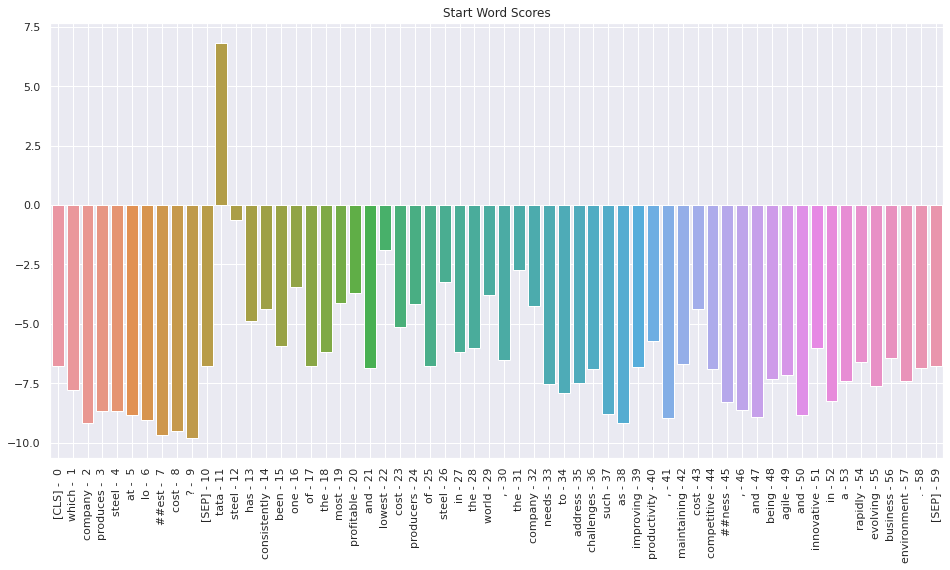

In [ ]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

Create a second bar plot showing the score for every input word being the "end" word.

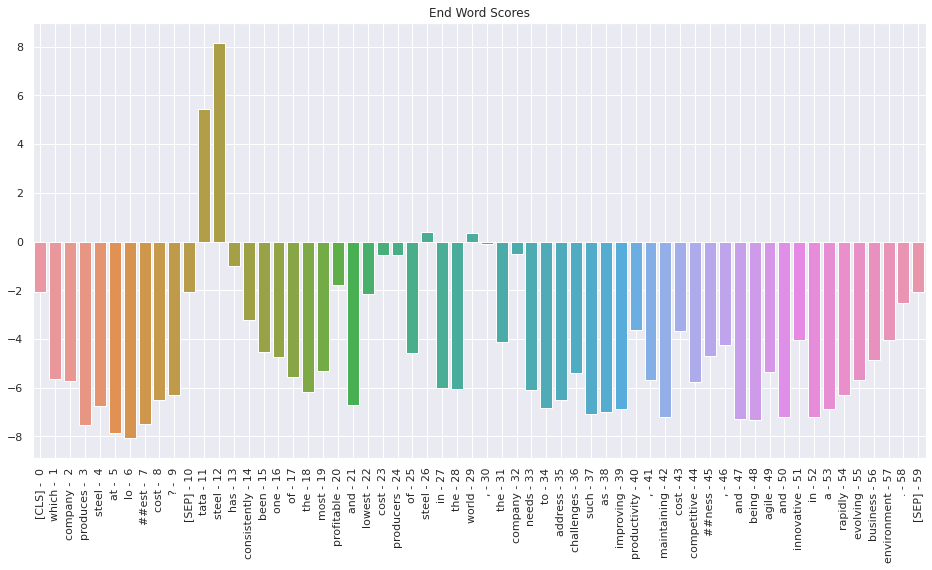

In [ ]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()

**Alternate View**

I also tried visualizing both the start and end scores on a single bar plot, but I think it may actually be more confusing then seeing them separately. 

In [ ]:
import pandas as pd

# Store the tokens and scores in a DataFrame. 
# Each token will have two rows, one for its start score and one for its end
# score. The "marker" column will differentiate them. A little wacky, I know.
scores = []
for (i, token_label) in enumerate(token_labels):

    # Add the token's start score as one row.
    scores.append({'token_label': token_label, 
                   'score': s_scores[i],
                   'marker': 'start'})
    
    # Add  the token's end score as another row.
    scores.append({'token_label': token_label, 
                   'score': e_scores[i],
                   'marker': 'end'})
    
df = pd.DataFrame(scores)


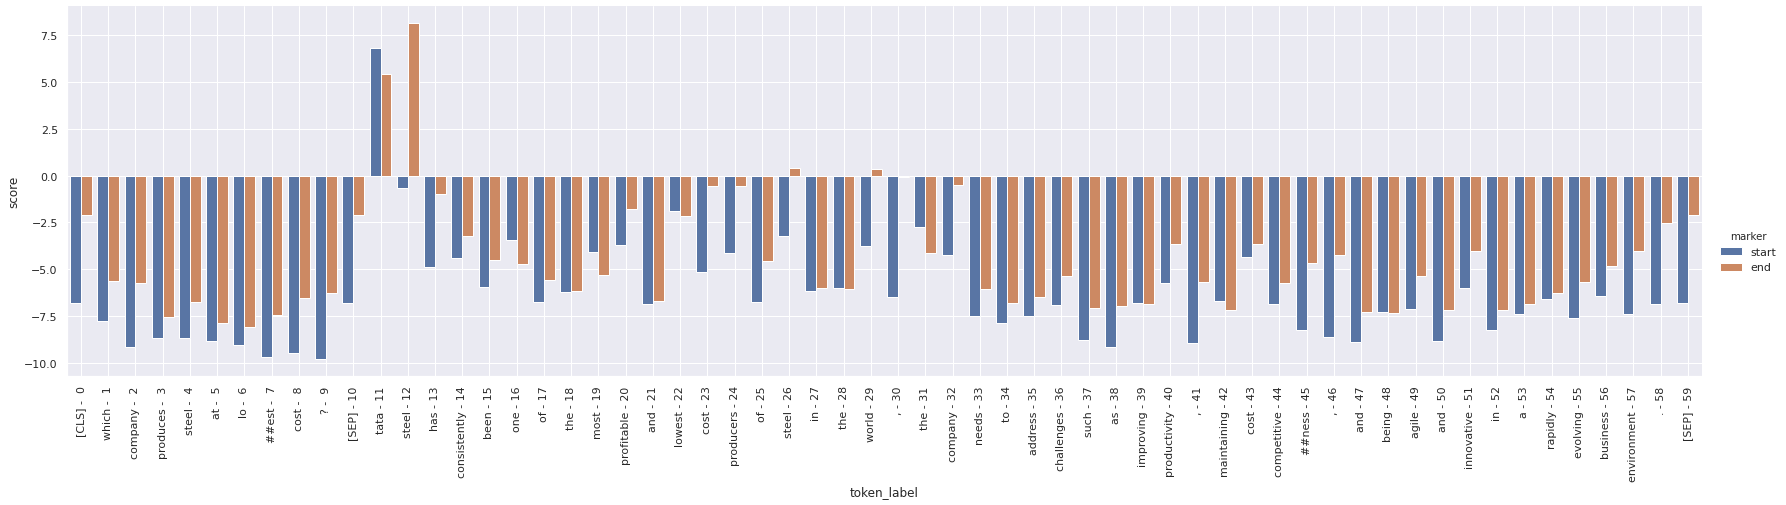

In [ ]:
# Draw a grouped barplot to show start and end scores for each word.
# The "hue" parameter is where we tell it which datapoints belong to which
# of the two series.
g = sns.catplot(x="token_label", y="score", hue="marker", data=df,
                kind="bar", height=6, aspect=4)

# Turn the xlabels vertical.
g.set_xticklabels(g.ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
g.ax.grid(True)


## 5. More Examples

Turn the QA process into a function so we can easily try out other examples.

In [ ]:
def answer_question(question, answer_text):
    '''
    Takes a `question` string and an `answer_text` string (which contains the
    answer), and identifies the words within the `answer_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.
    input_ids = tokenizer.encode(question, answer_text)

    # Report how long the input sequence is.
    print('Query has {:,} tokens.\n'.format(len(input_ids)))

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    # ======== Evaluate ========
    # Run our example question through the model.
    start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                    token_type_ids=torch.tensor([segment_ids])) # The segment IDs to differentiate question from answer_text

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
        
        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        
        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')

You can cut the sentence length using this.

In [ ]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=150) 

bert_abstract = dictionary[36]
print(wrapper.fill(bert_abstract))

37. Recoverable amount is the higher of fair value less costs to sell and value in use. In assessing value in use, the estimated future cash flows are
discounted to their present value using a pre-tax discount rate that reflects current market assessments of the time value of money and the risks
specific to the asset for which the estimates of future cash flows have not been adjusted. An impairment loss is recognized in the statement of profit
and loss as and when the carrying value of an asset exceeds its recoverable amount.


-----------------------------
Ask BERT what its name stands for (the answer is in the first sentence of the abstract).

In [ ]:
question = "What is recoverable amount ?"

answer_question(question, bert_abstract)

Query has 112 tokens.

Answer: "the higher of fair value less costs to sell and value in use"


In [ ]:
question = "What is an imapirment loss?"

answer_question(question, bert_abstract)

Query has 115 tokens.

Answer: "when the carrying value of an asset exceeds its recoverable amount"
